# MINOR PROJECT

**Objective of this Analysis:**<br>
    To understand the how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

 **What to do in  Exploratory Data Analysis:**<br>
1)To Analyse insights in the dataset.<br>
2)To understand the connection between the variables and to uncover the underlying structure.<br>
3)To extract the important Variables.<br>
4)To test the underlying assumptions.<br>
5)Provide Insights with Suitable Graphs and Visualizations.<br>
6)Write all your inferences with supporting Analysis and Visualization.<br>
<br>
<br>


**Importing the necessary libraries**

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the Student Performance File**

In [145]:
data=pd.read_csv(r"StudentsPerformance.csv")

In [146]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [147]:
#Lets see the information of the project
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


->This shows us the names of all the columns with their Data Type.<br>
  It also tells us that there are no null values in any of the columns<br>

In [148]:
# SHAPE OF THE DATASET
data.shape

(1000, 8)

**Analysis**<br>
This tells us about the shape of the data set, by showing the number of columns and rows><br>
Here we infer that no of columns are:8<br>
    and rows are:1000<br>


**Descriptive Statistics**

In [149]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Analysis**<br>
You can see the descriptive statistics of numerical variables such as total count, mean, standard deviation, minimum and maximum values and three quantiles of the data (25%,50%,75%).

We observe that the mean and standard deviation of all three scores are almost same. The minimum value obtained in maths is 0 which is the least amongst all three scores followed by writing score and reading score.And the maximum marks obtained is 100 in all three subjects.

In [150]:
# CHECKING THE NUMBER OF UNIQUE VALUES IN EACH COLUMN
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [151]:
# PRINTING THE UNIQUE VALUES PRESENT IN EACH OF THE COLUMNS
print("1)Categories in 'gender': ")
print(data['gender'].unique())
print("2)Categories in 'race/ethnicity': ")
print(data['race/ethnicity'].unique())
print("3)Categories in 'parental level of education': ")
print(data['parental level of education'].unique())
print("4)Categories in 'lunch': ")
print(data['lunch'].unique())
print("5)Categories in 'test preparation course': ")
print(data['test preparation course'].unique())

1)Categories in 'gender': 
['female' 'male']
2)Categories in 'race/ethnicity': 
['group B' 'group C' 'group A' 'group D' 'group E']
3)Categories in 'parental level of education': 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
4)Categories in 'lunch': 
['standard' 'free/reduced']
5)Categories in 'test preparation course': 
['none' 'completed']


**Adding a column named **'Total Score'
** which will store the sum of the scores obtained in maths, writing and reading for every student.<br>This feature will help in better analysing the overall performance of a student.**

In [152]:
#Total Score = math score + reading score + writing score
data['Total Score']=data['math score']+data['reading score']+data['writing score']

In [153]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275


**Adding a column named 'Pass/Fail' which will store the sum of the scores obtained in maths, writing and reading for every student.
This feature will help in better analysing the overall performance of a student.**<br>
A student will be considered as Pass when:<br>
a)Total Score>99 <br>
b)Math Score>33<br>
c)Reading Score>33<br>
d)Writing Score>33<br>

In [154]:
#FUNCTION TO CHECK IF A STUDENT HAS PASSED OR FAILED
# here TS= Total Score;MS= Maths Score; WS= Writing Score ; RS= Reading Score
def result(TS,MS,WS,RS ):
    if(TS>99 and MS>33 and WS>33 and RS>33):
        return 'P'
    else:
        return 'F'

In [155]:
data['Pass/Fail']=data.apply(lambda x: result(x['Total Score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )

In [156]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P
1,female,group C,some college,standard,completed,69,90,88,247,P
2,female,group B,master's degree,standard,none,90,95,93,278,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P
4,male,group C,some college,standard,none,76,78,75,229,P


In [157]:
data['Pass/Fail'].value_counts()

P    977
F     23
Name: Pass/Fail, dtype: int64

->This shows us the number of students passed and failed by the criteria decided earlier.
By analysing the data we see that majority of the students have passed and only 6% of the students failed.

## STUDENTS SCORING 90 AND ABOVE 90 IN ALL SUBJECTS

**Number of Girl Students Scoring above 90 in all the Subjects**

In [158]:
data[(data['gender'] == 'female') &
     (data['math score'] > 90) & 
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,P
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,P
179,female,group D,some high school,standard,completed,97,100,100,297,P
451,female,group E,some college,standard,none,100,92,97,289,P
458,female,group E,bachelor's degree,standard,none,100,100,100,300,P
546,female,group A,some high school,standard,completed,92,100,97,289,P
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,P
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,P
685,female,group E,master's degree,standard,completed,94,99,100,293,P
712,female,group D,some college,standard,none,98,100,99,297,P


**Number of Boy Students Scoring above 90 in all the Subjects**

In [159]:
data[(data['gender'] == 'male') &
     (data['math score'] > 90) & 
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,P
571,male,group A,bachelor's degree,standard,none,91,96,92,279,P
625,male,group D,some college,standard,completed,100,97,99,296,P
864,male,group C,associate's degree,standard,none,97,93,91,281,P
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,P
919,male,group B,some college,standard,completed,91,96,91,278,P


**Analysis**<br>
We observe from the above two tables that there are more number of girl students scoring 90 or more than 90 in all subjects than boy students.

**COMPARING THE SCORES SCORED BY BOYS AND GIRLS**

In [160]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

            Total Score              
        max         min median  max  
gender                               
female  100          27    211  300  
male    100          69    199  300

**Analysis**<br>
From the above data we see that:<br>
Minimum marks of females are lesser than males in all three subjects.<br>
Median of female students are lesser than male students only in maths, in reading and score females have greater median.<br>
Maximum marks of females and males are equal in all three subjects.<br> 

**COMPARING THE SCORES SCORED BY BOYS AND GIRLS ON THE BASIS OF THE LUNCH OFFERED**

In [161]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

**ANALYSIS**<br>
We observe that in free/reduced lunch category scores obtained by female students are more writing and reading, and male scored more in maths.<br>
In standard lunch also female students scored more in writing and reading and male scored more in maths.<br>

Overall if we compare the two lunch patterns we see that median score of students getting standard lunch is more than the students getting free/reduced lunch.<br>

**COMPARING THE SCORES SCORED BY BOYS AND GIRLS ON THE TEST PREPARATION COURSE**

In [162]:
data[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

**ANALYSIS**<br>
We observe that students who completed the test preparation course have a greater median than the students who didnt complete the test preparation course.<br>

If we see the median scored by female students and male students we conclude that female students greater median in writing and reading scores and male students got greater median in math score.<br>

**COMPARING THE SCORES SCORED BY BOYS AND GIRLS ON THE BASIS OF RACE/ETHNICITY**

In [163]:
data[['race/ethnicity','gender','math score','writing score','reading score']].groupby(['race/ethnicity','gender']).agg('median')

math score  writing score  reading score
race/ethnicity gender                                          
group A        female        57.0           67.0           67.5
               male          63.0           60.0           61.0
group B        female        62.0           71.5           71.5
               male          65.0           60.0           62.0
group C        female        63.0           74.0           73.0
               male          68.0           62.0           66.0
group D        female        65.0           76.0           74.0
               male          71.0           67.0           68.0
group E        female        71.0           76.0           76.0
               male          78.0           70.0           73.0

**ANALYSIS**<br>
We observe that Group E has the highest median.<br>

In [164]:
#to find out the percentage of female students passed
print("Percentage of female students passed: {0:.2f}%".format((data[(data['gender']=='female') & (data['Pass/Fail']=='P')].shape[0]/data[data['gender']=='female'].shape[0])*100))

#to find out the percentage of male students passed
print("Percentage of male students passed: {0:.2f}%".format((data[(data['gender']=='male') & (data['Pass/Fail']=='P')].shape[0]/data[data['gender']=='male'].shape[0])*100))

Percentage of female students passed: 96.91%
Percentage of male students passed: 98.55%


**Analysis**<br>
This shows that more male students passed as compared to the female students.

**Percentage of students passed in all ethnic groups**

In [165]:
#to find out the percentage of students passed with the race/ethnicity  as 'group A'
print("Percentage of students passed with the race/ethnicity  as 'group A': {0:.2f}%"
    .format((data[(data['race/ethnicity']=='group A') & (data['Pass/Fail']=='P')].shape[0]/data[data['race/ethnicity']=='group A'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group B'
print("Percentage of students passed with the race/ethnicity  as 'group B': {0:.2f}%"
    .format((data[(data['race/ethnicity']=='group B') & (data['Pass/Fail']=='P')].shape[0]/data[data['race/ethnicity']=='group B'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group C'
print("Percentage of students passed with the race/ethnicity  as 'group C': {0:.2f}%"
    .format((data[(data['race/ethnicity']=='group C') & (data['Pass/Fail']=='P')].shape[0]/data[data['race/ethnicity']=='group C'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group D'
print("Percentage of students passed with the race/ethnicity  as 'group D': {0:.2f}%"
    .format((data[(data['race/ethnicity']=='group D') & (data['Pass/Fail']=='P')].shape[0]/data[data['race/ethnicity']=='group D'].shape[0])*100))

#to find out the percentage of students passed with the race/ethnicity  as 'group E'
print("Percentage of students passed with the race/ethnicity  as 'group E': {0:.2f}%"
    .format((data[(data['race/ethnicity']=='group E') & (data['Pass/Fail']=='P')].shape[0]/data[data['race/ethnicity']=='group E'].shape[0])*100))


Percentage of students passed with the race/ethnicity  as 'group A': 97.75%
Percentage of students passed with the race/ethnicity  as 'group B': 95.79%
Percentage of students passed with the race/ethnicity  as 'group C': 97.49%
Percentage of students passed with the race/ethnicity  as 'group D': 98.85%
Percentage of students passed with the race/ethnicity  as 'group E': 98.57%


**Analysis**<br>
We observe that students in Group D have the highest pass percentage and in Group B have the least pass percentage.<br>

**Percentage of students passed based on different parental education**

In [166]:
#to find out the percentage of students passed with the parental level of education as 'some college'
print("Percentage of students passed with the parental level of education as 'some college': {0:.2f}%".format((data[(data['parental level of education']=='some college') & (data['Pass/Fail']=='P')].shape[0]/data[data['parental level of education']=='some college'].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'associate's degree'
print("Percentage of students passed with the parental level of education as 'associate's degree': {0:.2f}%".format((data[(data['parental level of education']=="associate's degree") & (data['Pass/Fail']=='P')].shape[0]/data[data['parental level of education']=="associate's degree"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'high school'
print("Percentage of students passed with the parental level of education as 'high school': {0:.2f}%" .format((data[(data['parental level of education']=="high school") & (data['Pass/Fail']=='P')].shape[0]/data[data['parental level of education']=="high school"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'some high school'
print("Percentage of students passed with the parental level of education as 'some high school': {0:.2f}%".format((data[(data['parental level of education']=="some high school") & (data['Pass/Fail']=='P')].shape[0]/data[data['parental level of education']=="some high school"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'bachelor's degree'
print("Percentage of students passed with the parental level of education as 'bachelor's degree': {0:.2f}%".format((data[(data['parental level of education']=="bachelor's degree") & (data['Pass/Fail']=='P')].shape[0]/data[data['parental level of education']=="bachelor's degree"].shape[0])*100))

#to find out the percentage of students passed with the parental level of education as 'master's degree'
print("Percentage of students passed with the parental level of education as 'master's degree': {0:.2f}%".format((data[(data['parental level of education']=="master's degree") & (data['Pass/Fail']=='P')].shape[0]/data[data['parental level of education']=="master's degree"].shape[0])*100))

Percentage of students passed with the parental level of education as 'some college': 97.79%
Percentage of students passed with the parental level of education as 'associate's degree': 99.55%
Percentage of students passed with the parental level of education as 'high school': 96.43%
Percentage of students passed with the parental level of education as 'some high school': 94.97%
Percentage of students passed with the parental level of education as 'bachelor's degree': 99.15%
Percentage of students passed with the parental level of education as 'master's degree': 100.00%


**Anaysis**<br>
We observe that students whose parents have education of master's degree have the highest pass percentage.<br>
And students whose parents have some high school education have least pass percentage.<br>

# Analysing data by using Graphs/Plots

**Graphs showing the maths score,reading score and writing score with their count**

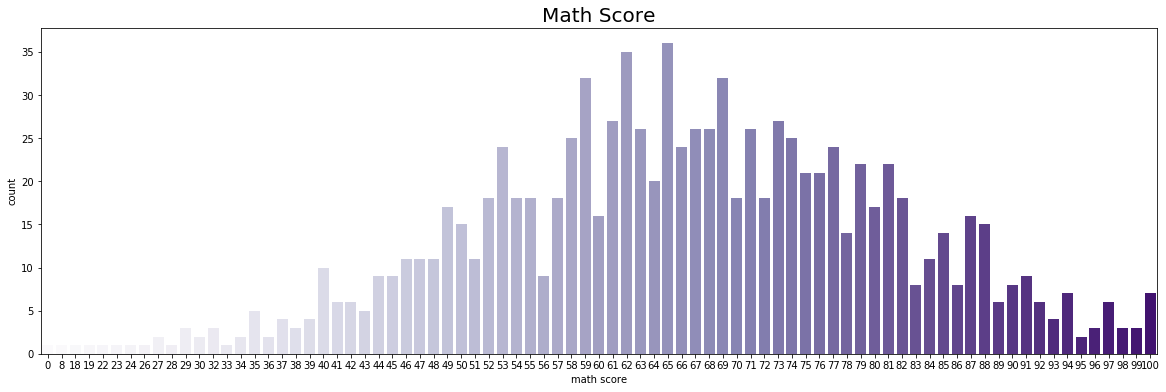

In [167]:
plt.rcParams['figure.figsize'] = (20, 6)
sns.countplot(data['math score'], palette = 'Purples')
plt.title('Math Score',fontsize = 20)
plt.show()

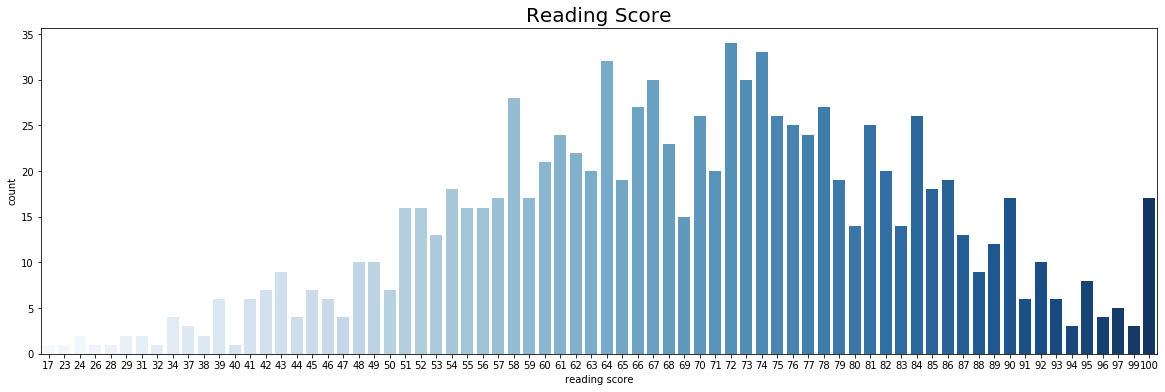

In [168]:
plt.rcParams['figure.figsize'] = (20, 6)
sns.countplot(data['reading score'], palette = 'Blues')
plt.title('Reading Score',fontsize = 20)
plt.show()

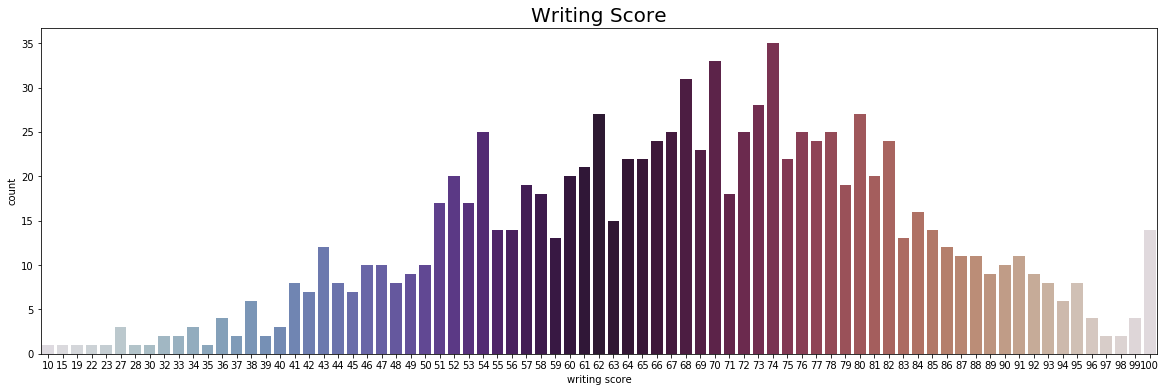

In [169]:
plt.rcParams['figure.figsize'] = (20, 6)
sns.countplot(data['writing score'], palette = 'twilight')
plt.title('Writing Score',fontsize = 20)
plt.show()

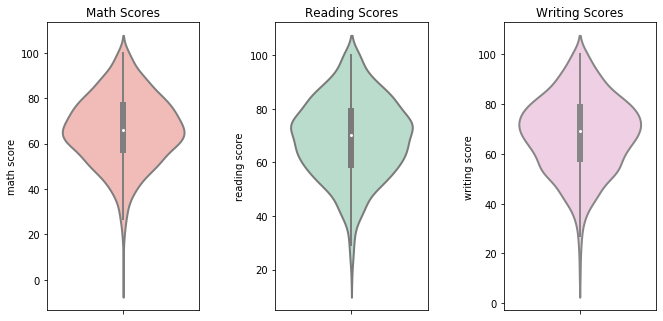

In [170]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score',data=data,palette = 'Pastel1',linewidth=2)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=data,palette = 'Pastel2',linewidth=2)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=data,palette = 'Pastel2_r',linewidth=2)
plt.show()

**Analysis**<br>
From above three plots we analyse that most of the people score from 60 to 80 in each maths,reading and writing.

**Plots showing the proportion of variables(Gender,Ethnicity,Parental Education,Lunch)**

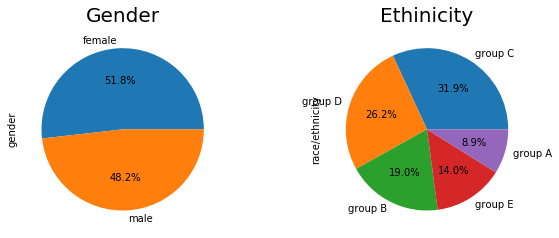

In [171]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
#Gender
plt.subplot(141)
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")


#Ethnicity
plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

**Analysis**<br>
a) There is no discrimation done on the basis of the gender as the number of male and females are almost equal.<br>
b) In the ethnicity Group C is the dominant one with 31.9% of the total and Group A is the least one with 8.9% of the total.<br>

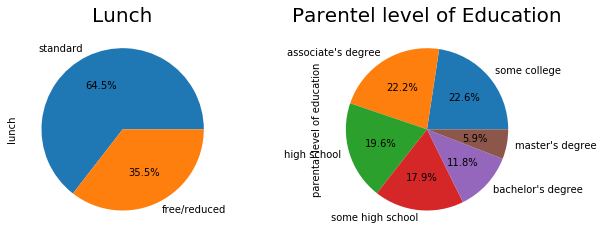

In [172]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
#Lunch
plt.subplot(143)
plt.title('Lunch',fontsize = 20)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

#Parental Education
plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

**Analysis**<br>
a) Major people are seen to have standard lunch pattern.<br>
b) Its observed that majority of parents have either done graduation(some college) or associate's degree. Whereas least no of parents have Master's Degree.

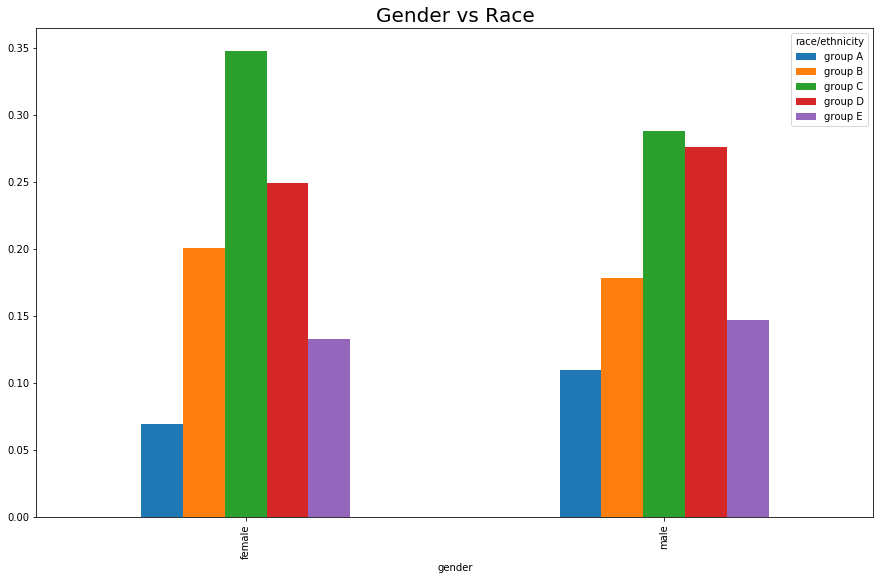

In [173]:
# CHECKING THE GENDER COUNT IN EACH GROUP OF RACE/ETHNICITY
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

**Analysis**<br>
We observe that both males and females are the most in number in Group C and least in Group A.<br>
On comparing between the genders we see that females in Group C and Group B are more in number as compared to males in group C and Group B.<br>
And males are more in Group A,Group D & Group E.<br>


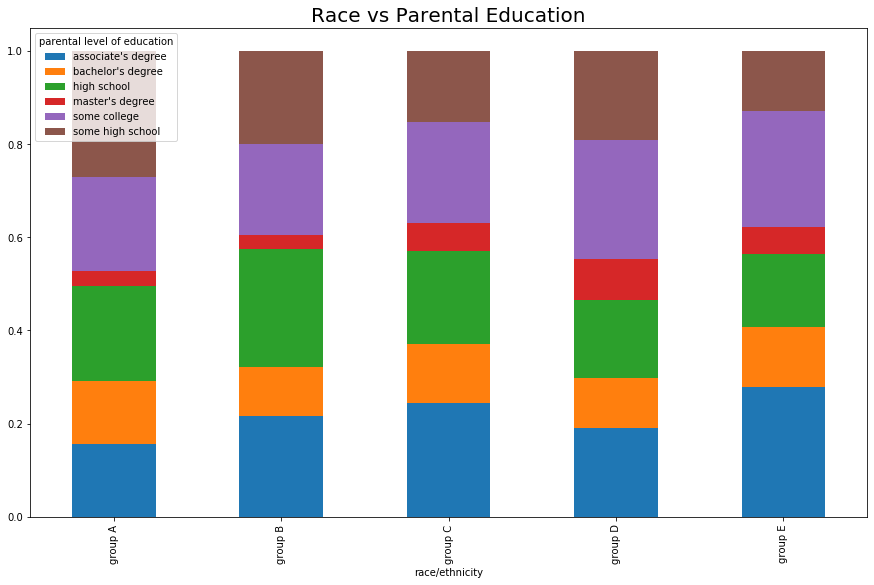

In [174]:
#CHECKING THE PARENTAL LEVEL OF EDUCATION BASED ON RACE/ETHNICITY
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

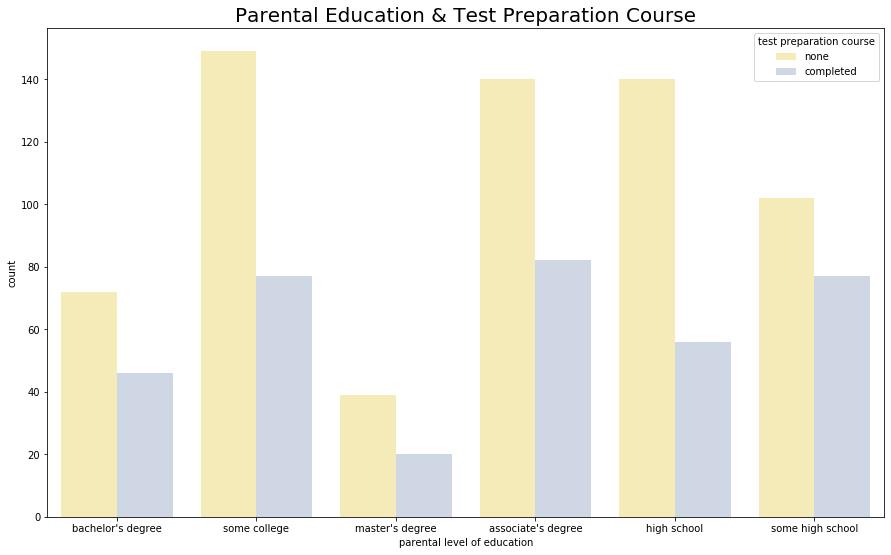

In [175]:
# CHECKING PARENTAL EDUCATION AND THE TEST PREPARATION COURSE
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'Pastel2_r')
plt.title('Parental Education & Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

**Analysis**<br>
We observe that parents having the degree of some college take no preparation course, whereas parents having the associate degree have completed the test preparation course.

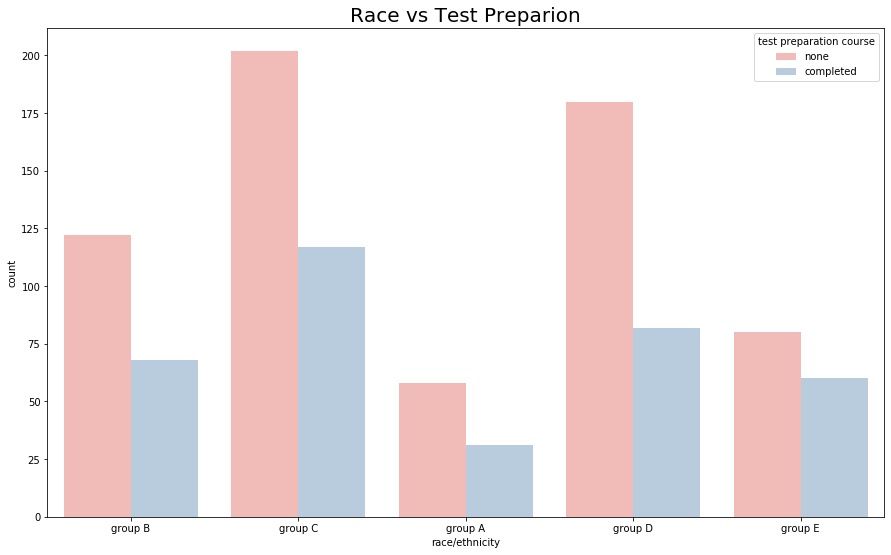

In [176]:
# CHECKING RACE/ETHNICITY AND TEST PREPARATION COURSE
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'Pastel1')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

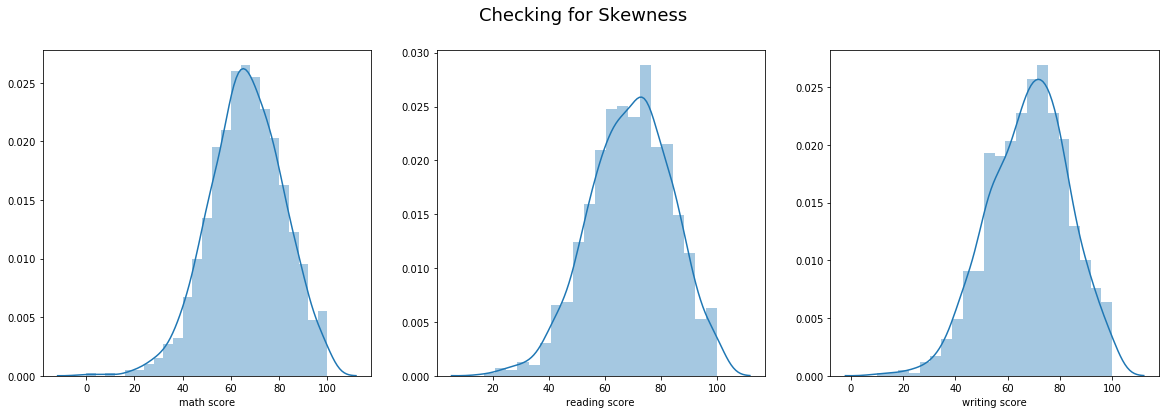

In [177]:
# CHECKING THE SKEWNESS FOR ALL THREE SCORES
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

**Analysis**<br>
The three plots tells us that there is no skewness present in the graphs. All of the three scores are symmetric.

##  Analysing Maths Score by other parameters:

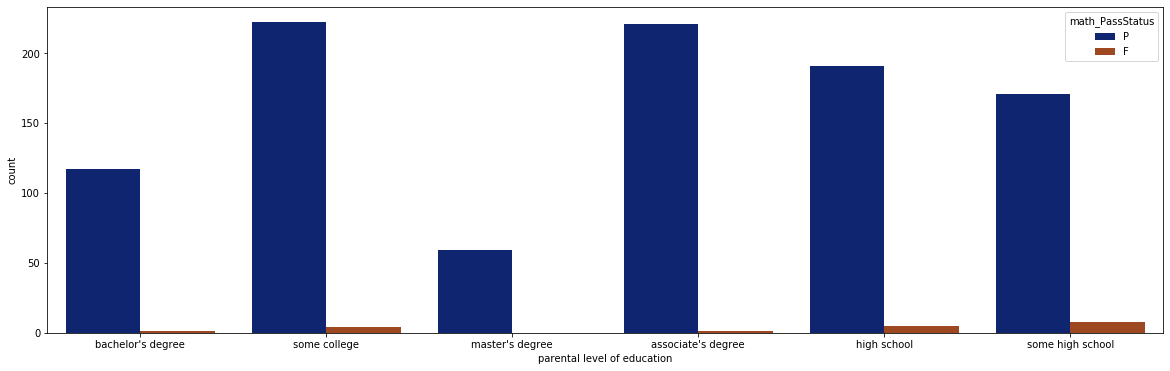

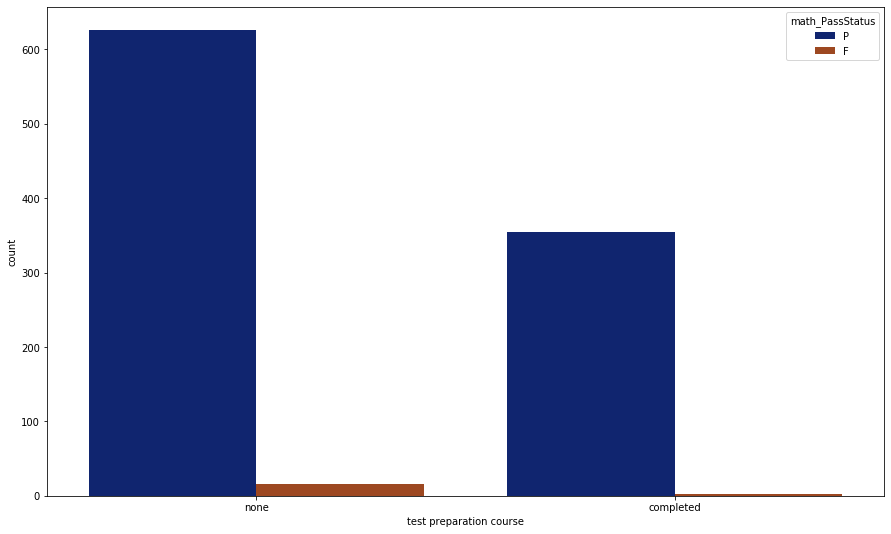

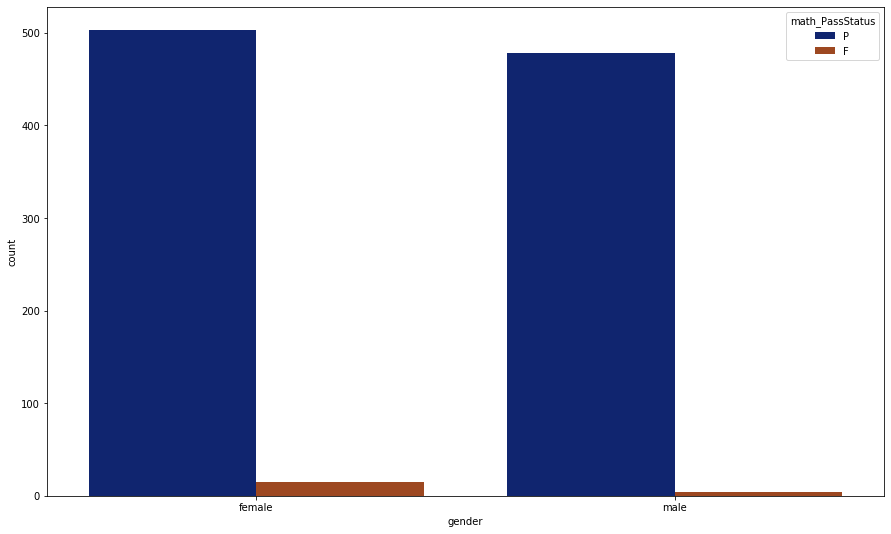

In [178]:
plt.figure(figsize=(20,6))
data['math_PassStatus'] = np.where(data['math score']<33, 'F', 'P')
p = sns.countplot(x='parental level of education', data = data, hue='math_PassStatus', palette='dark')
plt.show()
p = sns.countplot(x='test preparation course', data = data, hue='math_PassStatus', palette='dark')
plt.show()
p = sns.countplot(x='gender', data = data, hue='math_PassStatus', palette='dark')
plt.show()

**Analysis**<br>
PARENTAL LEVEL OF EDUCATION<br>
The above plot shows us the number of students who have passed and failed with respect to the parental level of education.<br>
We observe that parents having the education level of some college and associate,s degree have the highest amount of passed students.<br>
And parents having masters degree have least amount of failed students (almost 0).<br>

TEST PREPARATION COURSE<br>
The above plot shows us the number of students who have passed and failed with respect to the test preparation course.<br>
We observed that students with no preparation course have more number of students passed than with having a preparation course.<br>

GENDER<br>
The above plot shows us the number of students who have passed and failed with respect to the gender.<br>
We observe that both males and females have same number of passed students whereas there are more number of students failed if they are female.<br>


##  Analysing Reading Score by other parameters:

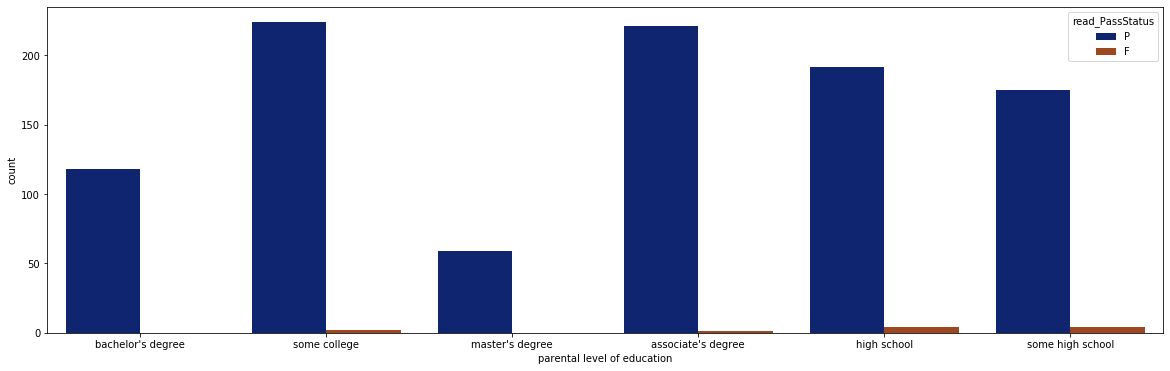

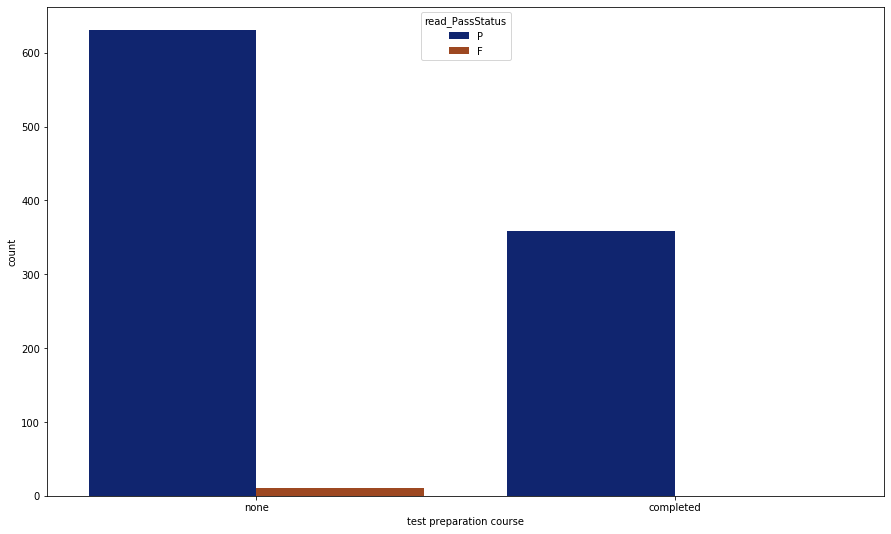

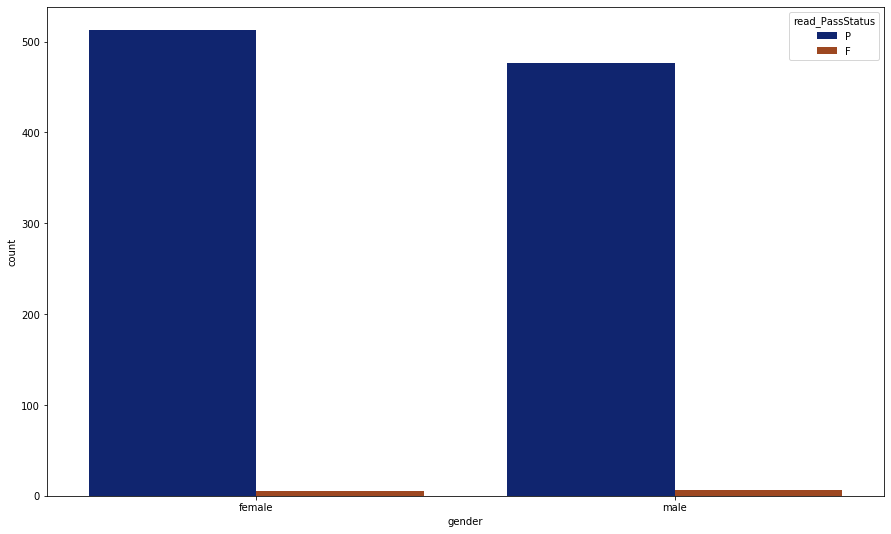

In [179]:
plt.figure(figsize=(20,6))
data['read_PassStatus'] = np.where(data['reading score']<33, 'F', 'P')
p = sns.countplot(x='parental level of education', data = data, hue='read_PassStatus', palette='dark')
plt.show()
p = sns.countplot(x='test preparation course', data = data, hue='read_PassStatus', palette='dark')
plt.show()
p = sns.countplot(x='gender', data = data, hue='read_PassStatus', palette='dark')
plt.show()

**Analysis**<br>
PARENTAL LEVEL OF EDUCATION<br>
The above plot shows us the number of students who have passed and failed with respect to the parental level of education.<br>
We observe that parents having the education level of some college and associate,s degree have the highest amount of passed students.<br>
And parents having masters degree have least amount of failed students (almost 0).<br>

TEST PREPARATION COURSE<br>
The above plot shows us the number of students who have passed and failed with respect to the test preparation course.<br>
We observed that students with no preparation course have more number of students passed than with having a preparation course.<br>

GENDER<br>
The above plot shows us the number of students who have passed and failed with respect to the gender.<br>
We observe that female students have more pass percentage than the male students.<br>

##  Analysing Writing Score by other parameters:

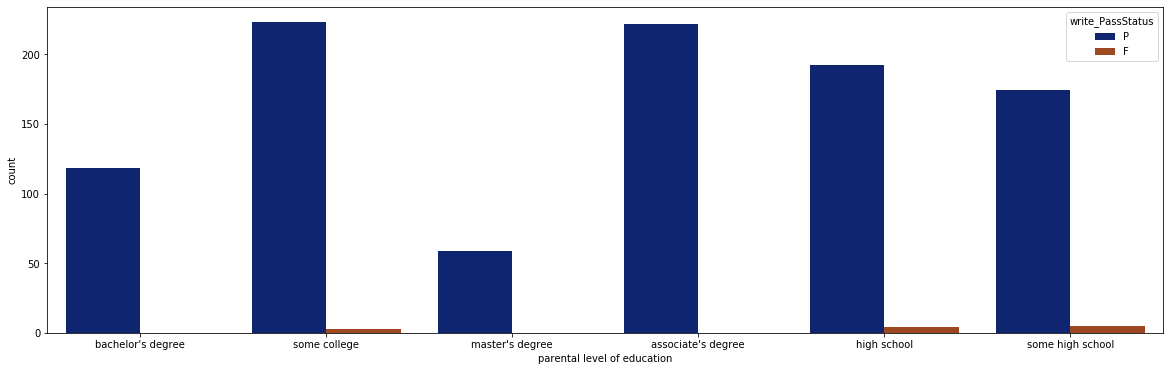

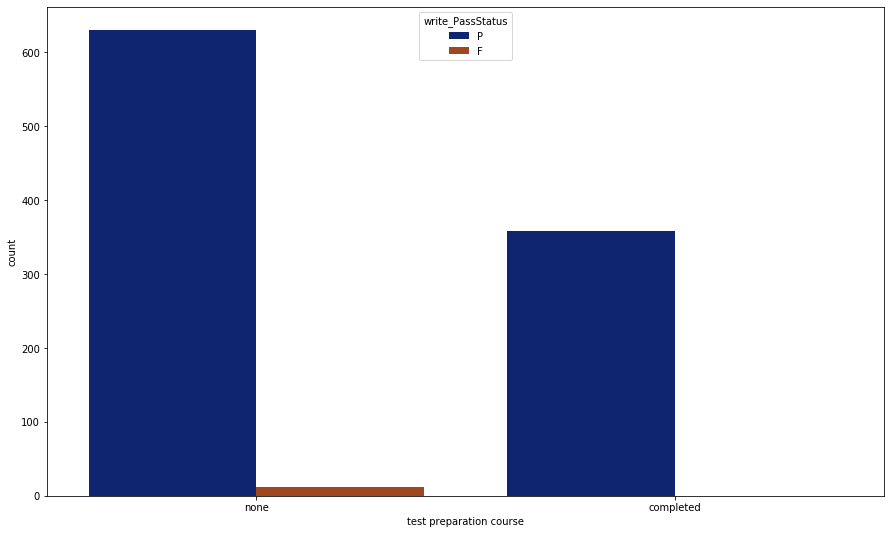

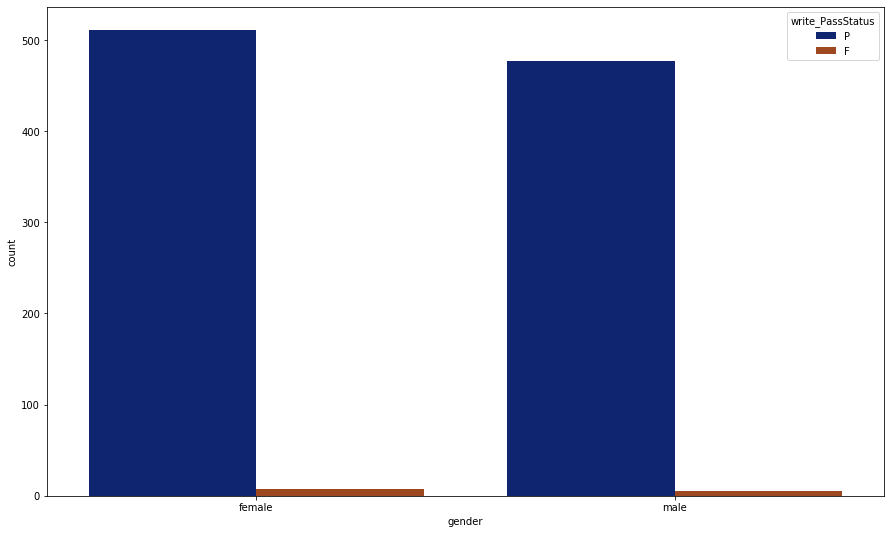

In [180]:
plt.figure(figsize=(20,6))
data['write_PassStatus'] = np.where(data['writing score']<33, 'F', 'P')
p = sns.countplot(x='parental level of education', data = data, hue='write_PassStatus', palette='dark')
plt.show()
p = sns.countplot(x='test preparation course', data = data, hue='write_PassStatus', palette='dark')
plt.show()
p = sns.countplot(x='gender', data = data, hue='write_PassStatus', palette='dark')
plt.show()

**Analysis**<br>
PARENTAL LEVEL OF EDUCATION<br>
The above plot shows us the number of students who have passed and failed with respect to the parental level of education.<br>
We observe that parents having the education level of some college and associate,s degree have the highest amount of passed students.<br>
And parents having masters degree have least amount of failed students (almost 0).<br>

TEST PREPARATION COURSE<br>
The above plot shows us the number of students who have passed and failed with respect to the test preparation course.<br>
We observed that students with no preparation course have more number of students passed than with having a preparation course.<br>

GENDER<br>
The above plot shows us the number of students who have passed and failed with respect to the gender.<br>
We observe that female students have more pass percentage than the male students.<br>

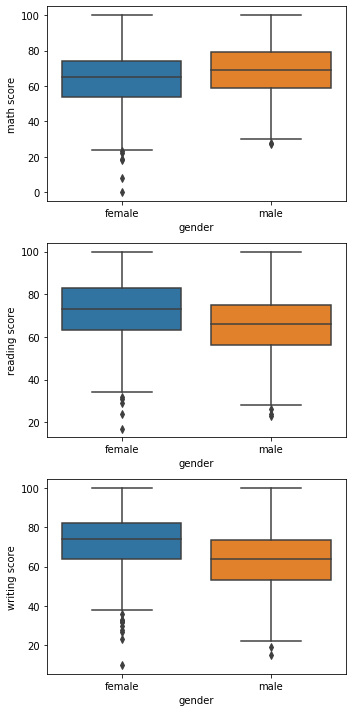

In [181]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.boxplot(x=data['gender'],y=data['math score'],ax=ax[0])
sns.boxplot(x=data['gender'],y=data['reading score'],ax=ax[1])
sns.boxplot(x=data['gender'],y=data['writing score'],ax=ax[2])
plt.tight_layout()

**Analysis**<br>
The boxplots represent the performance of the male students vs. the performance of the female students in the three courses separately. As can be seen from the medians and the number of outliers, it can be concluded that the female students performed relatively poorer than the male students in maths but they out-performed the male students in both reading and writing scores. Thus we can conclude that, in this case the performance of a student in a course varies with the gender.

**Checking the performance of students in various ethnic groups**

The number of students passed across various race/ethnic group : 
group C    311
group D    259
group B    182
group E    138
group A     87
Name: race/ethnicity, dtype: int64
GRAPHICAL REPRESENTATION OF THE DATA IS:


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

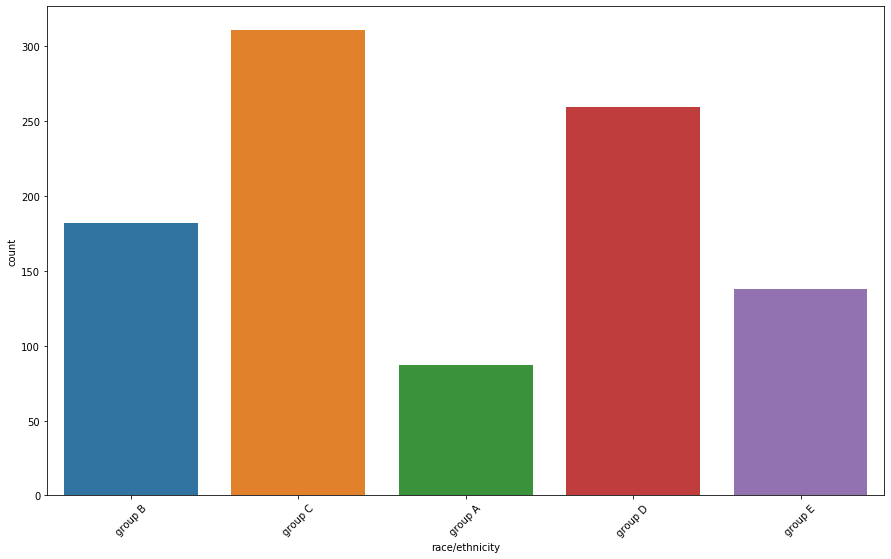

In [182]:
print("The number of students passed across various race/ethnic group : ")
print(data['race/ethnicity'].loc[data['Pass/Fail']=='P'].value_counts())
print("GRAPHICAL REPRESENTATION OF THE DATA IS:")
sns.countplot(data['race/ethnicity'].loc[data['Pass/Fail']=='P'])
plt.xticks(rotation = 45)

**Analysis**<br>
We see that students belonging to Group-C have the most no of passed students whereas students belonging to Group-A have the least no of passed students.<br>

**Checking the performance of students having different lunch patterns**

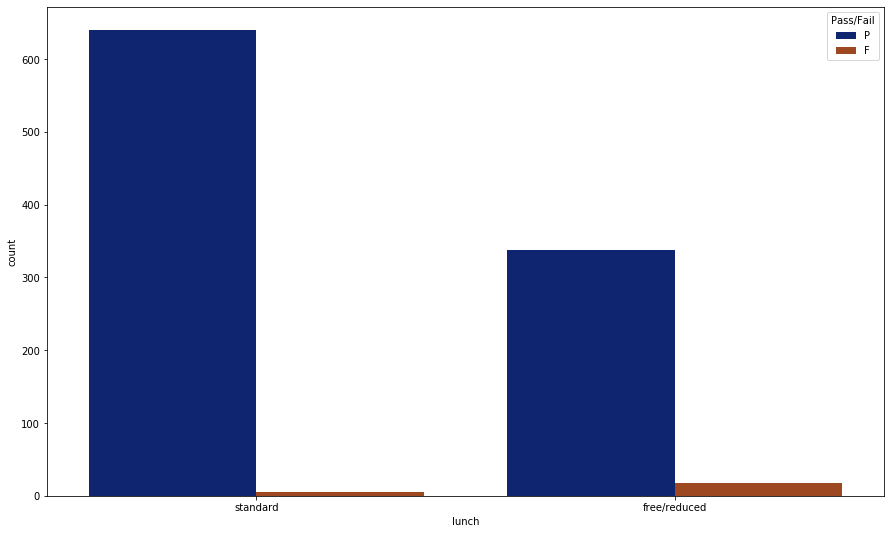

In [183]:
sns.countplot(data['lunch'],hue=data['Pass/Fail'],palette='dark')

**Analysis**<br>
By observing the graph we conclude that students having standard lunch are more in number in passing as compared to students having free/reduced lunch.<br>

**Checking maths score based on lunch**

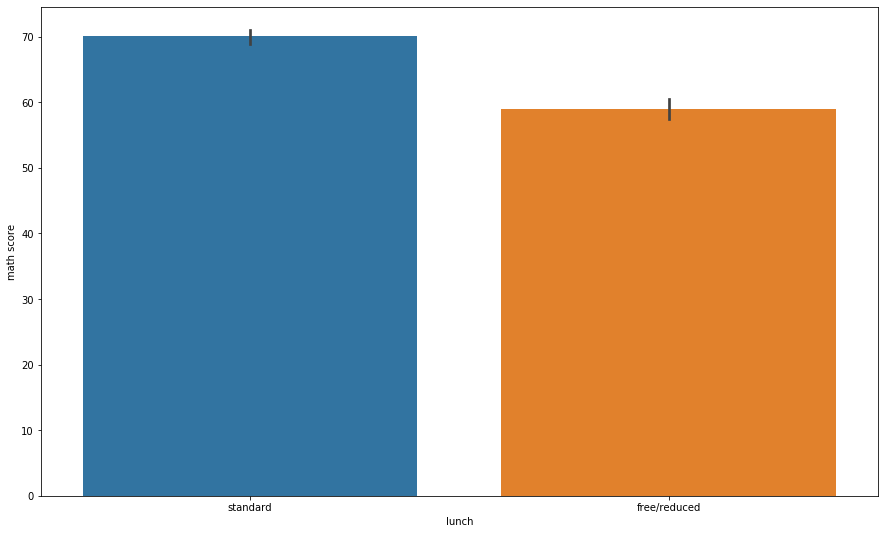

In [184]:
sns.barplot(x='lunch',y='math score',data=data)
plt.show()

**Checking reading score based on lunch**

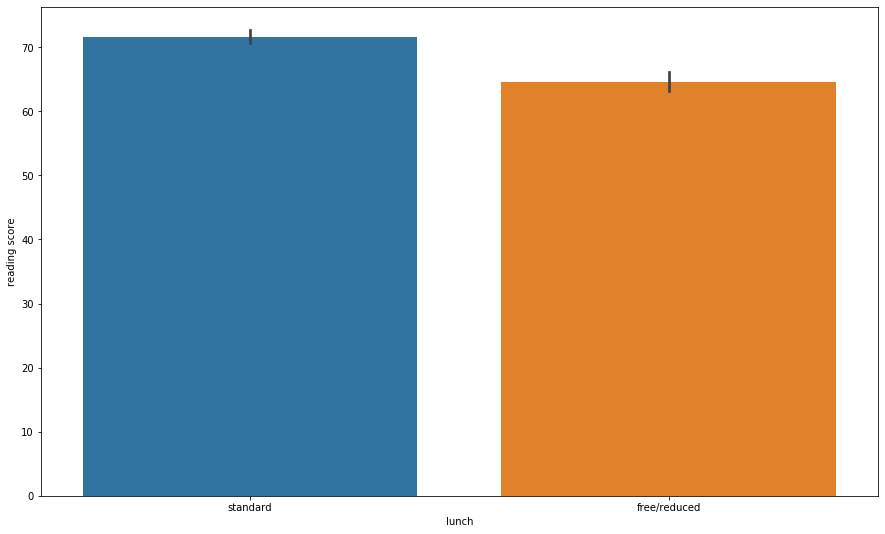

In [185]:
sns.barplot(x='lunch',y='reading score',data=data)
plt.show()

**Checking writing score based on lunch**

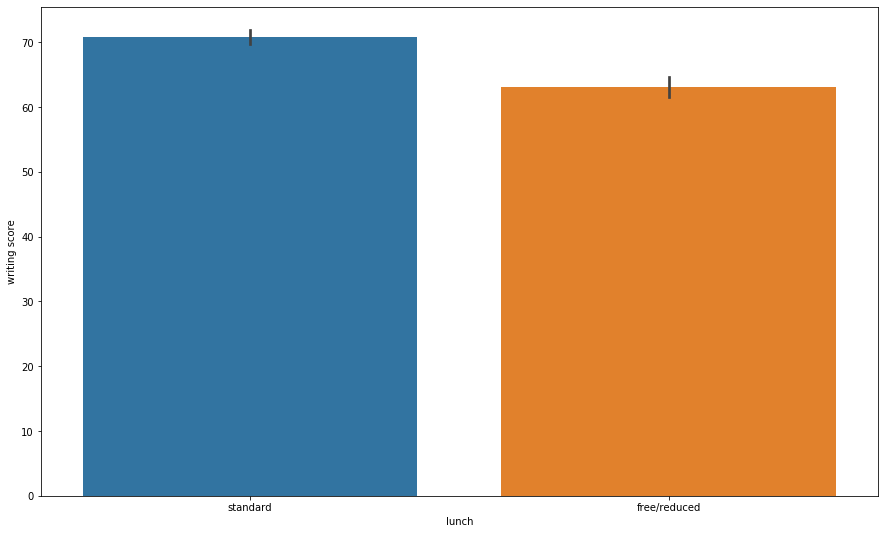

In [186]:
sns.barplot(x='lunch',y='writing score',data=data)
plt.show()

In [187]:
print("Mean of the total score based on lunch:")
data.groupby('lunch').mean()['Total Score']

Mean of the total score based on lunch:


lunch
free/reduced    186.597183
standard        212.511628
Name: Total Score, dtype: float64

**Checking maths score based on parental level of education**

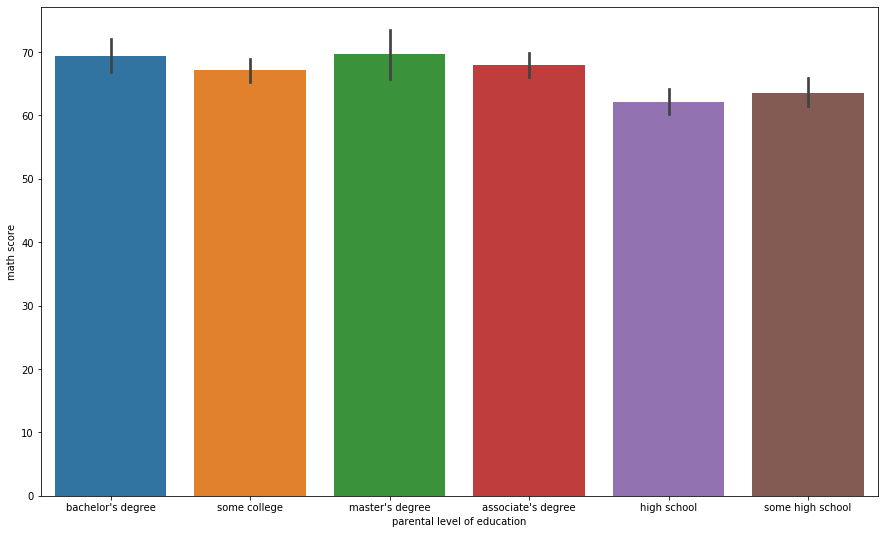

In [188]:
sns.barplot(x='parental level of education',y='math score',data=data)
plt.show()

**Checking reading score based on parental level of education**

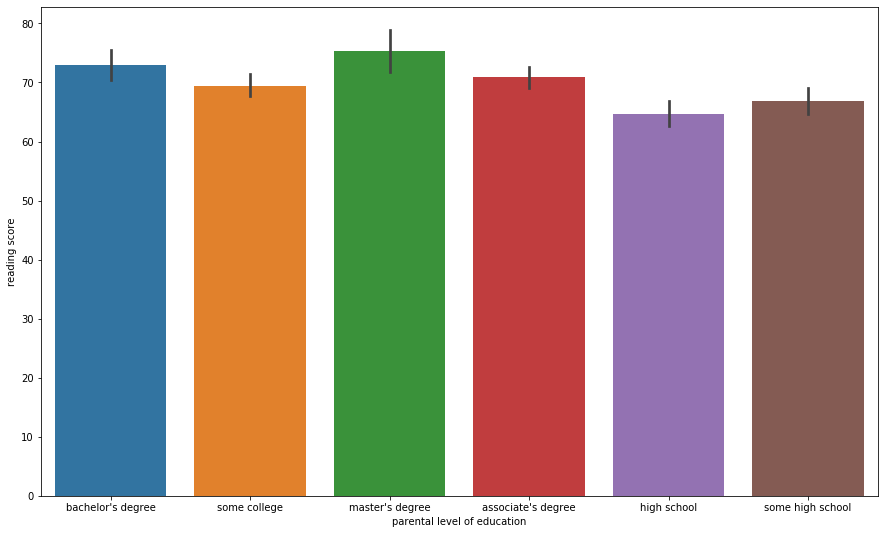

In [189]:
sns.barplot(x='parental level of education',y='reading score',data=data)
plt.show()

**Checking writing score based on parental level of education**

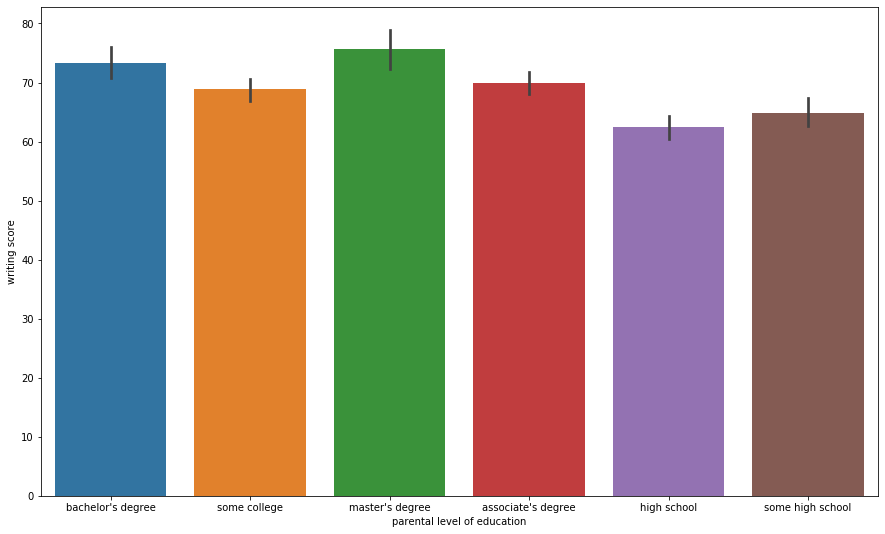

In [190]:
sns.barplot(x='parental level of education',y='writing score',data=data)
plt.show()

**Checking the co-relation between all three scores of the students**

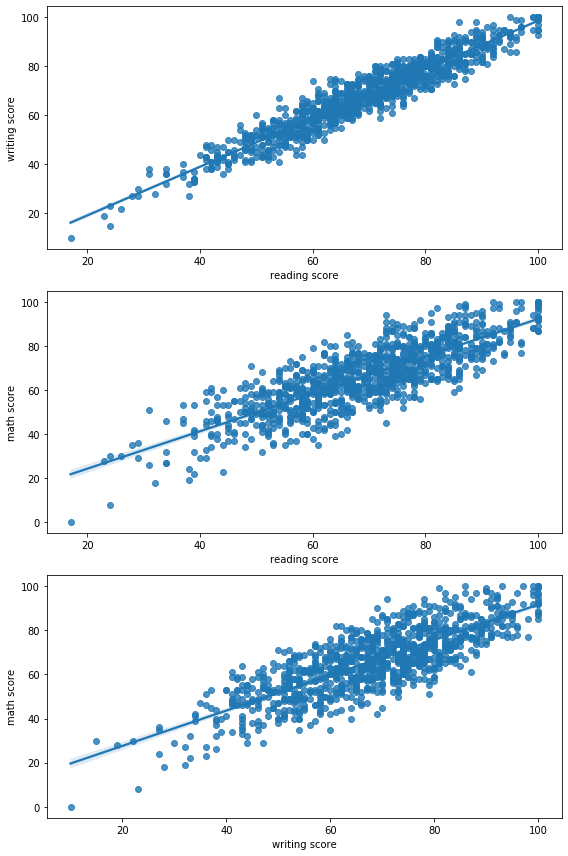

In [191]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.regplot(x=data['reading score'],y=data['writing score'],ax = ax[0])
sns.regplot(x=data['reading score'],y=data['math score'],ax = ax[1])
sns.regplot(x=data['writing score'],y=data['math score'],ax=ax[2])
plt.tight_layout()

**Analysis**<br>
It can be observed from the above plots that there is a strong correlation between all the scores. 

# CONCLUSION:

- Males have slightly higher scores than females in the math portion.<br>
- Females have much higher scores than males in reading and writing portion.<br>
- Lunch received seems to have the biggest impact on test scores.<br>
- Parental education seems to have an impact on test scores but it is not as big.<br>
- Race/ethnicity also had a big impact on test scores.<br>
- It can be assumed that the groups have a higher socioeconomic status.<br>

1) Does one particular gender excel another?<br>
Yes, the mean percent female score is higher compared to male we have statistical evidence to prove our assumption derived from descriptive statistics.<br>

2) Does practice help to excel scores?<br>
Yes, the mean percent of students who have taken pre test course is higher than the mean percent of students who have not taken pre test course evidence to prove our assumption derived from descriptive statistics.<br>

3) Does one particular race oversmarts others?<br>
From the data visualization we have seen that the group E outperforms other groups.<br>

## **VARIABLES USED**<br>

- Gender<br>
- Race/Ethnicity<br>
- Parental Level Of Education<br>
- Lunch<br>
- Test Preparation Course<br>
- Maths Score<br>
- Reading Score<br>
- Writing Score<br>

**VARIABLES ADDED ADDITIONALLY:** <br> 
- Total Score<br>
- Pass/Fail<br>
- Maths_PassStatua<br>
- Read_PassStatua<br>
- Write_PassStatua<br>

**DONE BY:** BHAVYA JOSHI
